# Data Analytics Project - US STATE CRIME (1960-2019)

Authors: Agnieszka Welian, Katarzyna Wątorska
<br>
Date: 14-06-2022

<div style  = "text-align: justify">Crime statistics are made available for public review by the Unified Crime Reporting Statistics under the collaboration of the U.S. Department of Justice and the Federal Bureau of Investigation. The following data set has information on the crime rates and totals for each state across the United States that has been collected over the years 1960 - 2019. The crime reports are divided into two main categories: property crime and violent crime. Property crime refers to burglary, larceny, and motor related crime, while violent crime refers to assault, murder, rape and robbery. </div>

<div style='text-align:justify'>The main goal of this project is to describe the burglary rate and investigate the correlation between two types of crimes: burglary and larceny for the California state.
Thre created models may help in getting bigger insight into the phenomenon of these two crimes, the possible correlation between them and be a beginning of the task of forecasting crime occurrence, as well as evaluating police effectiveness. </div>

The data come from: https://think.cs.vt.edu/corgis/csv/state_crime/ and are a repost from the FBI website. Crime rates are reported per 100 000 inhabitants.

<div style='text-align:justify'>Two different models were chosen to model crime rates - normal distribution and linear model. 
Research provided the information that mean of the burglary rate is approximately equal to 1300 and the standard deviation of the burglary rate is approximately equal to 600. Taking that into account, normal distribution with parameters $\mu$ = 1300, $\sigma$ = 600 has been introduced.
Linear model uses a predictor - larceny rate. Research showed that the mean value and standard deviation of larceny rate in California are around 1275 and 600, consequently. Those data are used to construct an alpha parameter $\alpha = normal(1275, 600)$. The beta and sigma have distributions: $\beta = lognormal(1, 0)$, $\sigma = exponential(0.005)$.
The first model checks if it is possible to describe the given gurglary rates with a normal distribution, whereas the second one tries to predict burglary rates basing on larceny rates.
    
 are two different models specified [1 pt]
are difference between two models explained [1 pt]
is the difference in the models justified (e.g. does adding aditional parameter makes sense? ) [1 pt]
are models sufficiently described (what are formulas, what are parameters, what data are required ) [1 


</div>

# 1. Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import scipy.stats as stats
import arviz as az
import matplotlib as mpl
plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi'] = 200

In [2]:
#read the data from the csv file
df = pd.read_csv("state_crime.csv")
df.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [3]:
#print column names
df.columns

Index(['State', 'Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery'],
      dtype='object')

In [4]:
#choose 1 state
california = df[df["State"] == "California"]

<div style = "text-align: justify">During basic analysis different crime rates were plotted on a scatter graph with x-axis displaying years. It is visible that the data seems to be flawed - most graphs have 3 points (for years 2013 - 2015) that do not fit the general trend line. Some data manipulation helped to determine that there must have occurred an intermingling of the data between different columns. For Larceny, the records from the mentioned range of time, were found in the column of Motor crime rates. For the Burglary, the data was fitted from the Larceny column. Verification of the data from the FBI website confirmed that the hipothesis is correct. Thus, appropriate corrections have been introduced to the dataset. </div>

Text(0.5, 1.0, 'Data before processing')

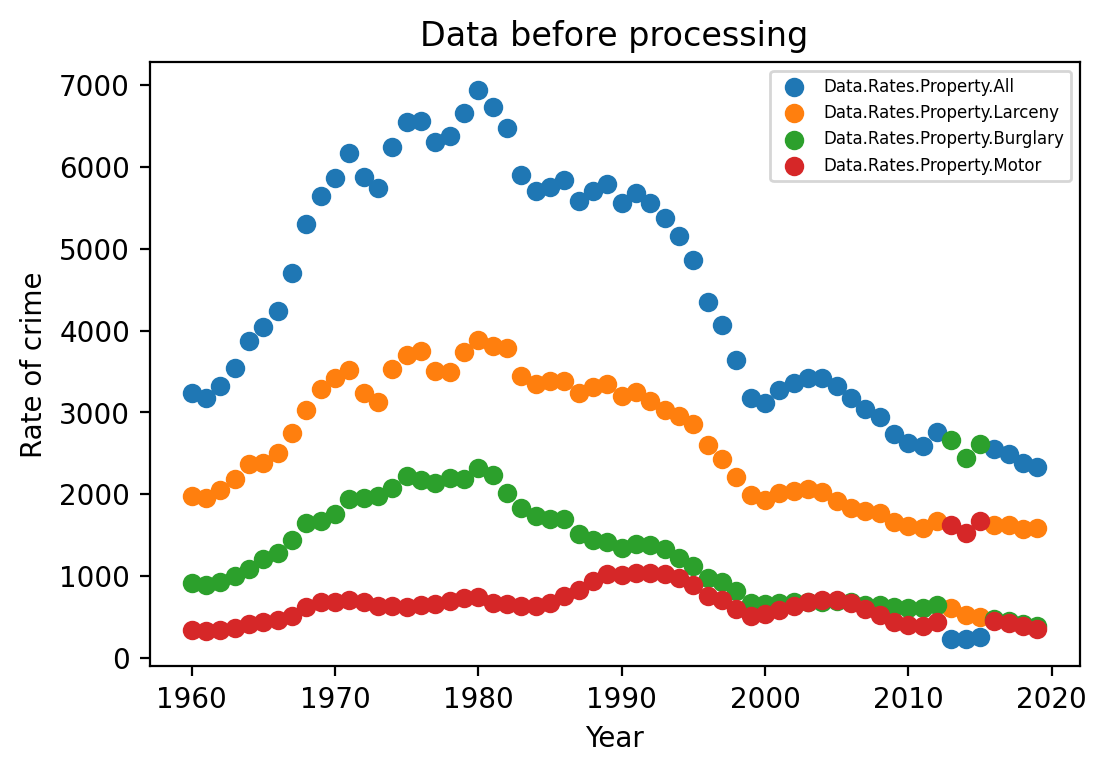

In [5]:
#plot raw data for all property crime rates, larceny, burglary and motor crime rates
fig,ax = plt.subplots()
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Burglary')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Motor')
plt.legend(loc="upper right", prop={'size':6})
plt.xlabel('Year')
plt.ylabel('Rate of crime')
plt.title("Data before processing")

In [6]:
#corrections of dataset
for i in range(0, len(df)):
    if df['Data.Rates.Property.All'][i] <  df['Data.Rates.Property.Burglary'][i]:
        x = df['Data.Rates.Property.All'][i]
        df['Data.Rates.Property.All'][i] =  df['Data.Rates.Property.Burglary'][i]
        df['Data.Rates.Property.Burglary'][i] = x
    if df['Data.Rates.Property.Larceny'][i] <  df['Data.Rates.Property.Motor'][i]:
        y = df['Data.Rates.Property.Larceny'][i]
        df['Data.Rates.Property.Larceny'][i] =  df['Data.Rates.Property.Motor'][i]
        df['Data.Rates.Property.Motor'][i] = y
    if df['Data.Rates.Property.Burglary'][i] <  df['Data.Rates.Property.Motor'][i]:
        z = df['Data.Rates.Property.Burglary'][i]
        df['Data.Rates.Property.Burglary'][i] =  df['Data.Rates.Property.Motor'][i]
        df['Data.Rates.Property.Motor'][i] = z

/tmp/ipykernel_13729/3248312617.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.All'][i] =  df['Data.Rates.Property.Burglary'][i]
/tmp/ipykernel_13729/3248312617.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.Burglary'][i] = x
/tmp/ipykernel_13729/3248312617.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.Larceny'][i] =  df['Data.Rates.Property.Motor']

Text(0.5, 1.0, 'Data after correction')

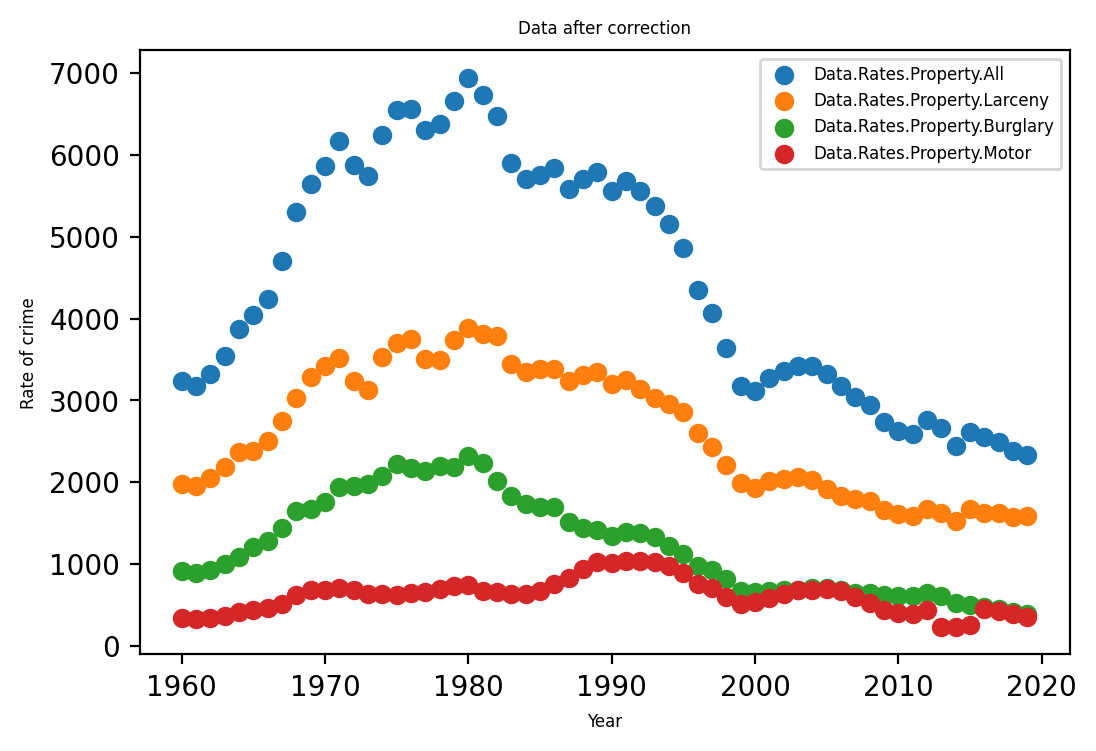

In [7]:
#plot corrected data
california = df[df["State"] == "California"]
fig,ax = plt.subplots()

ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Burglary')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Motor')
plt.legend(loc="upper right", prop={'size':6})
plt.xlabel('Year', fontsize = 6)
plt.ylabel('Rate of crime', fontsize = 6)
plt.title("Data after correction", fontsize = 6)

The motor crime rates still seem to be not well-matched, but since this project does not concentrate on motor realted crimes, it is left so.

In [8]:
california.describe()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
count,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,1989.500000,2.855579e+07,4475.756667,1228.918333,2620.975000,616.905000,617.291667,339.663333,7.89000,34.218333,224.545000,1.163731e+06,3.580828e+05,691070.750000,201472.483333,178274.266667,99361.366667,2207.50000,9654.166667,62802.366667
std,17.464249,7.628299e+06,1478.502570,594.524257,778.947315,207.456626,242.850555,152.225295,3.11365,10.450099,104.734474,4.012412e+05,1.865597e+05,203269.217232,119409.517507,79088.695892,51175.017672,870.82368,3161.458981,30578.344402
min,1960.000000,1.571720e+07,2331.200000,386.100000,1527.400000,232.300000,232.700000,119.600000,3.70000,17.400000,19.500000,8.902900e+04,1.431020e+05,197404.000000,53453.000000,37558.000000,18796.000000,605.00000,2859.000000,7464.000000
25%,1974.750000,2.111550e+07,3177.725000,674.300000,1922.125000,443.275000,440.800000,241.225000,4.87500,25.300000,147.475000,9.858202e+05,2.317542e+05,620181.750000,139242.500000,136046.000000,53445.500000,1744.25000,8280.000000,48528.250000
50%,1989.500000,2.941151e+07,4294.700000,1164.950000,2555.650000,635.600000,572.700000,319.050000,6.85000,34.150000,198.450000,1.185550e+06,3.209860e+05,695103.000000,168435.500000,180857.000000,99075.500000,2188.50000,9872.500000,62310.000000
75%,2004.250000,3.592007e+07,5760.975000,1708.150000,3346.200000,696.875000,801.500000,410.650000,10.60000,41.650000,311.450000,1.492620e+06,4.356690e+05,859776.750000,241611.000000,210350.250000,136183.250000,2772.25000,11997.750000,84399.500000
max,2019.000000,3.955704e+07,6939.500000,2316.500000,3880.000000,1038.900000,1119.700000,641.600000,14.50000,58.200000,424.100000,1.726391e+06,1.024914e+06,986120.000000,656517.000000,345624.000000,198045.000000,4096.00000,15505.000000,130897.000000


In [9]:
california['Data.Rates.Property.Burglary'].describe()


count      60.000000
mean     1228.918333
std       594.524257
min       386.100000
25%       674.300000
50%      1164.950000
75%      1708.150000
max      2316.500000
Name: Data.Rates.Property.Burglary, dtype: float64

In [10]:
california['Data.Rates.Property.Larceny'].describe()

count      60.000000
mean     2620.975000
std       778.947315
min      1527.400000
25%      1922.125000
50%      2555.650000
75%      3346.200000
max      3880.000000
Name: Data.Rates.Property.Larceny, dtype: float64

# 2. Normal model - Prior predictive check

In this section is presented an attempt to fit Normal(µ, σ) distribution to burglary rate in California. 

In [11]:
with open('normal_ppc.stan', 'r') as file:
    print(file.read())

generated quantities {
  real mu = normal_rng(1300, 600);  //1300 - mean based on research, 600 - std based on research
  real <lower = 0> sigma = exponential_rng(0.005); //uncertainty is 200, 1/0.005 = 200
  real burglary = normal_rng(mu, sigma);
}


In [12]:
normal_model1 = CmdStanModel(stan_file = 'normal_ppc.stan')

R = 1000 
sim_normal = normal_model1.sample(iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)

mu_normal_ppc = sim_normal.stan_variable('mu')
sigma_normal_ppc = sim_normal.stan_variable('sigma')
burglary_normal_ppc = sim_normal.stan_variable('burglary')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


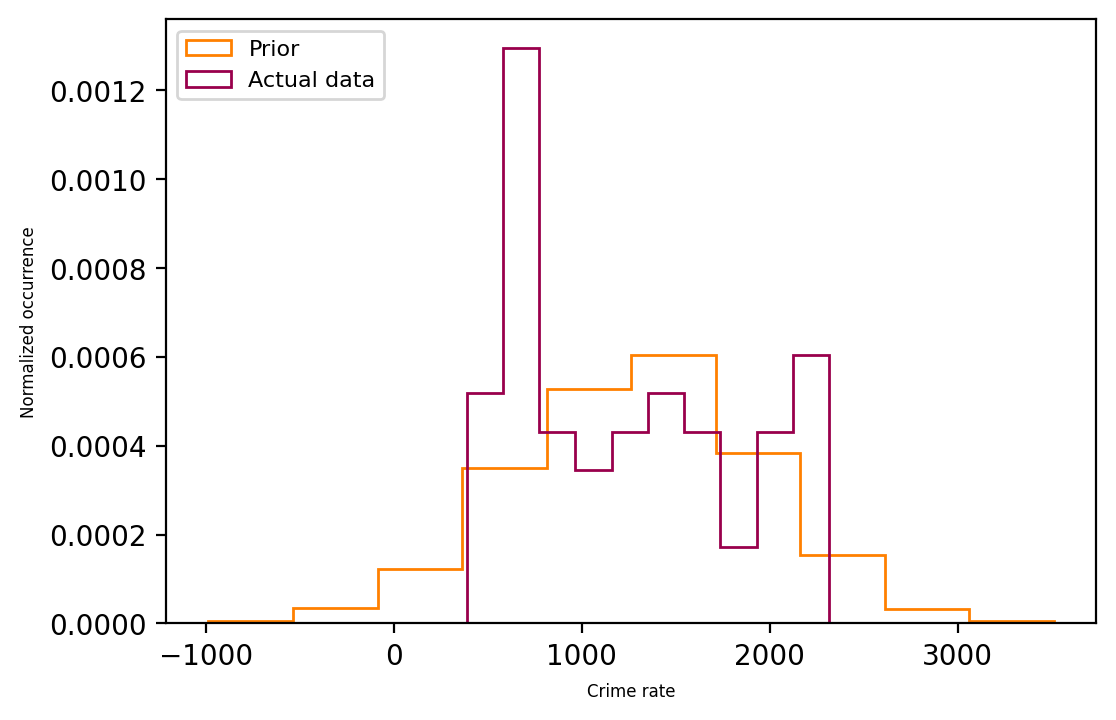

In [13]:
#histogram comparing prior and actual data
plt.hist(burglary_normal_ppc, bins=10, label= "Prior", histtype='step', color = '#ff8000', density = True)
plt.hist(california['Data.Rates.Property.Burglary'], bins=10, label= "Actual data", 
         histtype='step', color = '#99004c', density = True)
plt.legend(loc="upper left", prop={'size':8})
plt.xlabel('Crime rate', fontsize = 6)
plt.ylabel('Normalized occurrence', fontsize = 6)
plt.show()

<div style="text-align:justify">The prior seems to fit the actual data quite well. It encompases the whole data range, however, is not able to detect the initial peak (crime rate around 700) and the final peak (around 2200). </div>

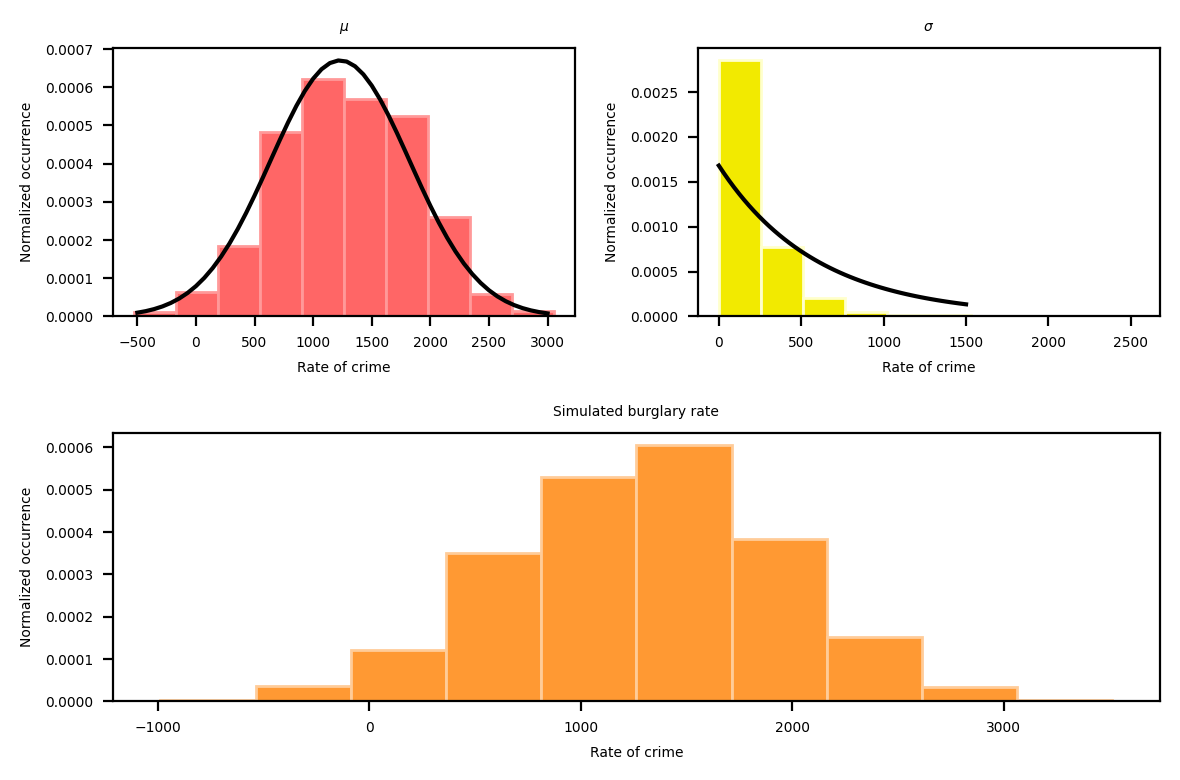

In [14]:
#histograms of mean, standard deviation and burglary rate from the prior - comparison with real data
fig = plt.figure()
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
plt.rcParams.update()
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[1, :])
ax1.hist(burglary_normal_ppc, bins = 10, density = True, color = '#ff9933', edgecolor = '#ffcc99')
ax1.set_title('Simulated burglary rate', fontsize=5)
plt.xlabel('Rate of crime', fontsize=5)
plt.ylabel('Normalized occurrence', fontsize=5)

ax2 = fig.add_subplot(gs[0, 0])
ax2.hist(mu_normal_ppc, bins = 10, density = True, color= '#FF6666', edgecolor = '#ff9999')
x = np.linspace(-500, 3000)
y = stats.norm.pdf(x, loc = 1229, scale = 595)
ax2.plot(x, y, 'black')
ax2.set_title('$\mu$', fontsize = 5)
plt.xlabel('Rate of crime', fontsize = 5)
plt.ylabel('Normalized occurrence', fontsize = 5)

ax3 = fig.add_subplot(gs[0, 1])
ax3.hist(sigma_normal_ppc, bins = 10, density = True, color = '#f2ea00', edgecolor = '#ffffcc')
x = np.linspace(0, 1500)
y = stats.expon.pdf(x, scale = 595)
ax3.plot(x, y, color = 'black')
ax3.set_title('$\sigma$', fontsize = 5)
plt.xlabel('Rate of crime', fontsize = 5)
plt.ylabel('Normalized occurrence', fontsize = 5)
fig.tight_layout()
plt.show()

The graphs display the comparison of actual mean and standard deviation distributions with the ones extracted from the prior model. The overall result is quite satisfying.

# 3. Normal model - Posterior and inference

The following model hasbeen introduced: 

In [15]:
with open('normal_fit.stan', 'r') as file:
    print(file.read())

data {
    int N;
    real burglaries[N];
}

parameters {
   real <lower=0> mu;
   real <lower = 0> sigma;
}

model {
    mu ~ normal(1300, 600);
    sigma ~ exponential(0.005);
    burglaries ~ normal(mu, sigma);
	target += normal_lpdf(burglaries[j] | mu, sigma);
}

generated quantities {
    vector[N] log_lik;
	real burglary[N];
    for (j in 1:N)
    {
        log_lik[j] = normal_lpdf(burglaries[j] | mu, sigma);
		 burglary[j] = normal_rng(mu, sigma);
    }

}


In [17]:
normal_fit = CmdStanModel(stan_file = 'normal_fit.stan')
stan_data={"N": len(california), "burglaries": california['Data.Rates.Property.Burglary']}

R = 1000
sim_normal_fit = normal_fit.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 1000,  
                             chains = 4, seed = 31052022)

mu_normal_fit = sim_normal_fit.stan_variable('mu')
sigma_normal_fit = sim_normal_fit.stan_variable('sigma')
burglary_normal_fit = sim_normal_fit.stan_variable('burglary')

INFO:cmdstanpy:compiling stan file /home/kasia/Documents/DataAnalytics/Project/newest_da/normal_fit.stan to exe file /home/kasia/Documents/DataAnalytics/Project/newest_da/normal_fit
INFO:cmdstanpy:compiled model executable: /home/kasia/Documents/DataAnalytics/Project/newest_da/normal_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/kasia/Documents/DataAnalytics/Project/newest_da/normal_fit.hpp /home/kasia/Documents/DataAnalytics/Project/newest_da/normal_fit.stan
Warning in '/home/kasia/Documents/DataAnalytics/Project/newest_da/normal_fit.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/kasia/Documents/DataAnalytics/Project/newest_da/normal_fit.stan', line 21, column 1: Declaration
    of arrays by placing brackets after a variable

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


ValueError: The 'color' keyword argument must have one color per dataset, but 60 datasets and 1 colors were provided

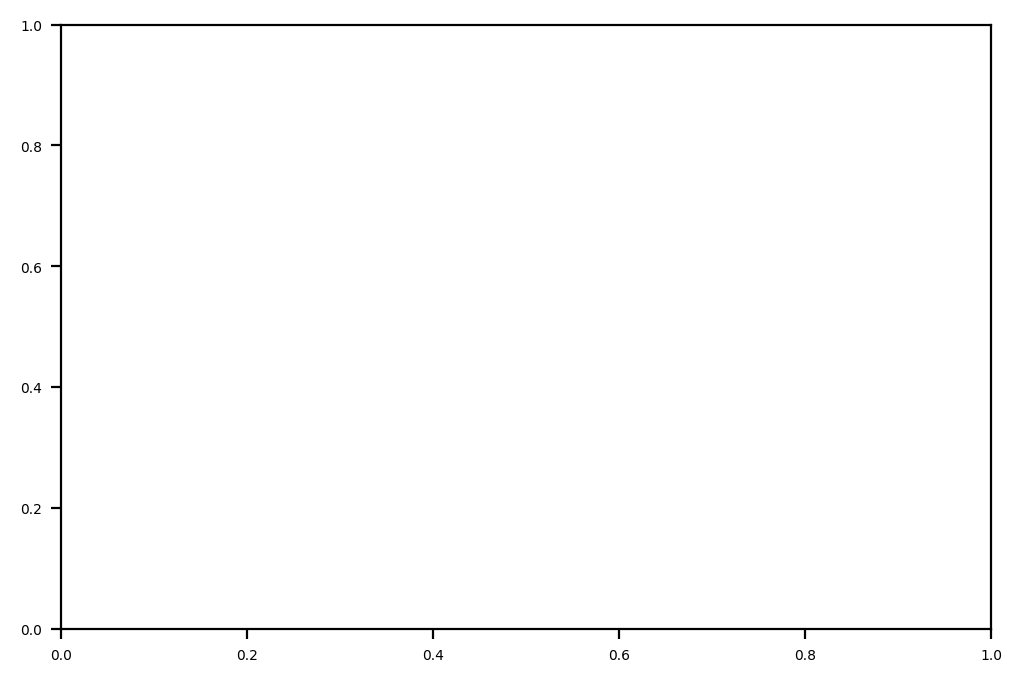

In [18]:
#histograms of posterior and actual data
plt.hist(burglary_normal_fit, bins=10, label= "Posterior", histtype='step', color = '#4c9900', density = True)
plt.hist(california['Data.Rates.Property.Burglary'], bins=10, label= "Actual data", histtype='step',
         color = '#99004c', density = True)
plt.legend(loc="upper left", prop={'size':8})
plt.xlabel('Burglary rate', fontsize = 8)
plt.ylabel('Normalized occurrence', fontsize = 8)
plt.autoscale(enable=True)
plt.show()

The posterior data seem to be slightly better fitted than the prior data, yet they range is bigger (-2300, 7300). However, judging from the histogram, the distant values do not play a big role.

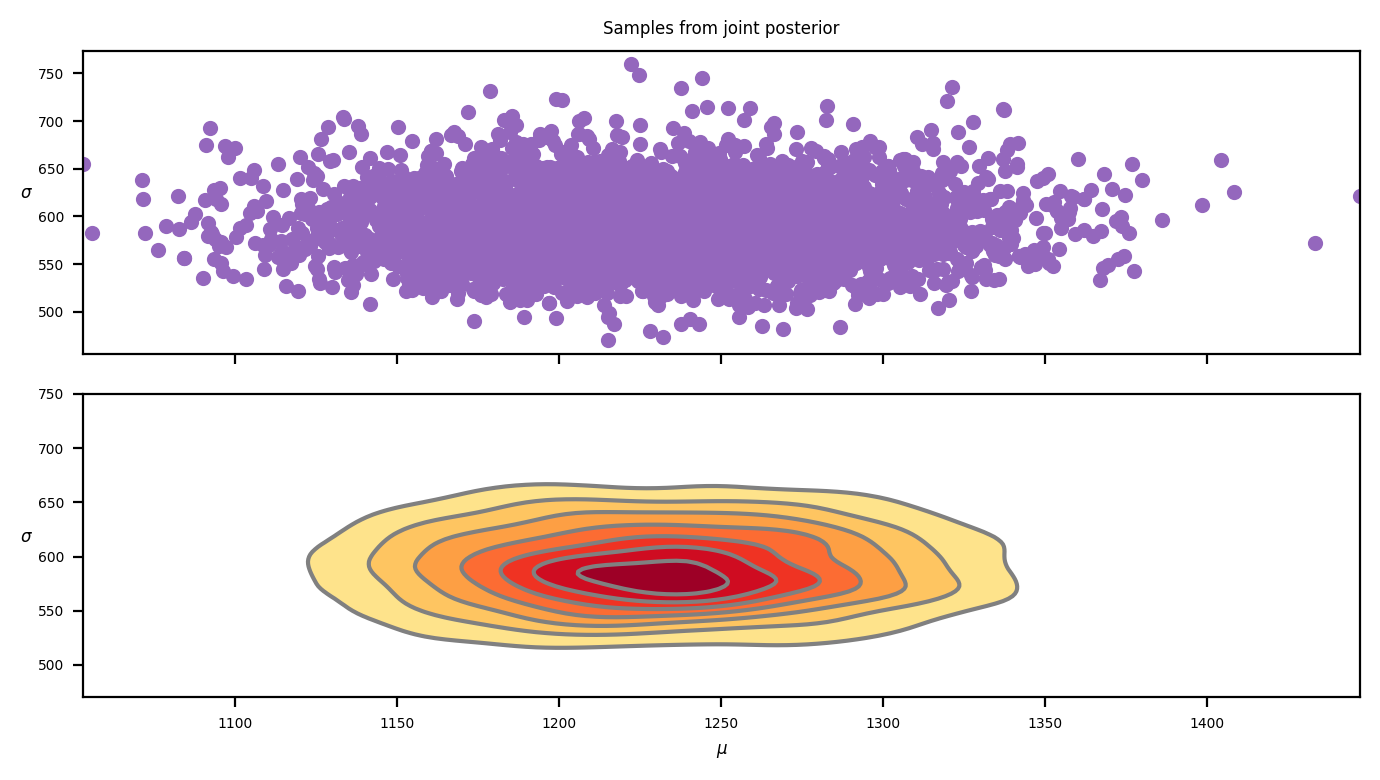

In [21]:
#samples from joint posterior
fig, axes = plt.subplots(2,1, figsize = (7,4), sharex = True)
ax1 = axes[0]
ax1.scatter(mu_normal_fit, sigma_normal_fit, 20,  color = '#9467bd')
ax1.set_ylabel(r'$\sigma$', rotation = 0, fontsize = 6)
ax1.set_title('Samples from joint posterior', fontsize = 6)

ax2 = axes[1]
az.plot_kde(mu_normal_fit, sigma_normal_fit, ax = ax2, contourf_kwargs = {'cmap': 'YlOrRd'})
ax2.set_ylabel(r'$\sigma$', rotation = 0, fontsize = 6)
ax2.set_xlabel(r'$\mu$', fontsize = 6)
fig.tight_layout()
plt.ylim(top = 750)
plt.show()

In [ ]:
#comparison of observed and predicted burglary rate
fig, axes = plt.subplots(1, 2, figsize = (7, 4), sharex = False, sharey = False)
ax = axes[0]
ax.hist(california['Data.Rates.Property.Burglary'], bins = 20, density = True, color = '#99004c')
ax.set_title('Observed burglary rate', fontsize = 6)
ax.set_xlim(0, 3000)
ax.set_xlabel('Burglary rate', fontsize = 6)
ax.set_ylabel('Normalized occurrence', fontsize = 6)

ax2 = axes[1]
ax2.hist(burglary_normal_fit, bins = 20, density = True, color = '#4c9900')
ax2.hist(california['Data.Rates.Property.Burglary'], bins = 20, histtype = 'step', color = '#99004c', 
         linewidth= 0.5, density = True)
ax2.set_title('Predicted burglary rate',fontsize = 6)
ax2.set_xlim([-1000, 3000])
ax2.set_xlabel('Burglary rate',fontsize = 6)
ax2.set_ylabel('Normalized occurrence',fontsize = 6)
fig.tight_layout()
plt.show()

<div style='text-align:justify'>The posterior shows a typical normal distrbution shape, whereas the actual data histogram does not fit it well. The model is not able to show the higher values around the rate of 700 and smaller or none around the rates of 1500 and 2000. The posterior data encompases wider data range, proposing also minus crime rates. Thus, normal distribution model does not seem to be able to model this phenomenon. It would better fit if its shape were more positively-skewed and the mean value was shifted towards the left, at around 750 (but that is not the actual mean value of this crime rate). </div>

# 4. Linear model - Prior predictive check

<div style='text-align:justify'>To improve the analysis of the crime rates in California, a linear model is introduced. It predicts burglary rate, using predictor of larceny rate. Research showed that the mean value and standard deviation of larceny rate in California are 1275 and 600, consequently. They were used to construct an alpha parameter. The predictor is centered by substracting the mean value of larceny rate calculated from the actual data. </div>

In [23]:
california['c_Data.Rates.Property.Larceny'] = california['Data.Rates.Property.Larceny'] - california['Data.Rates.Property.Larceny'].mean()

/tmp/ipykernel_13729/3910386004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california['c_Data.Rates.Property.Larceny'] = california['Data.Rates.Property.Larceny'] - california['Data.Rates.Property.Larceny'].mean()


In [25]:
with open('linear_ppc.stan', 'r') as file:
    print(file.read())

data {
   int N;
   real larceny[N];
}

generated quantities {
   real alpha = normal_rng(1275, 600);
   real beta = lognormal_rng(0,1);
   real <lower = 0> sigma = exponential_rng(0.005);
   real <lower = 0> burglary[N];
   for (i in 1:N) {
      burglary[i] = normal_rng(larceny[i]*beta + alpha, sigma);
   }
}


In [26]:
normal_model1 = CmdStanModel(stan_file = 'linear_ppc.stan')
stan_data={'N': len(california["Data.Rates.Property.Larceny"]),
           "larceny": np.linspace(california["c_Data.Rates.Property.Larceny"].min(),
                                  california["c_Data.Rates.Property.Larceny"].max(), num = 60)}

R = 1000
sim = normal_model1.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)

alpha_sim = sim.stan_variable('alpha')
beta_sim = sim.stan_variable('beta')
sigma_sim = sim.stan_variable('sigma')
burglary_linear_pcc = sim.stan_variable('burglary')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


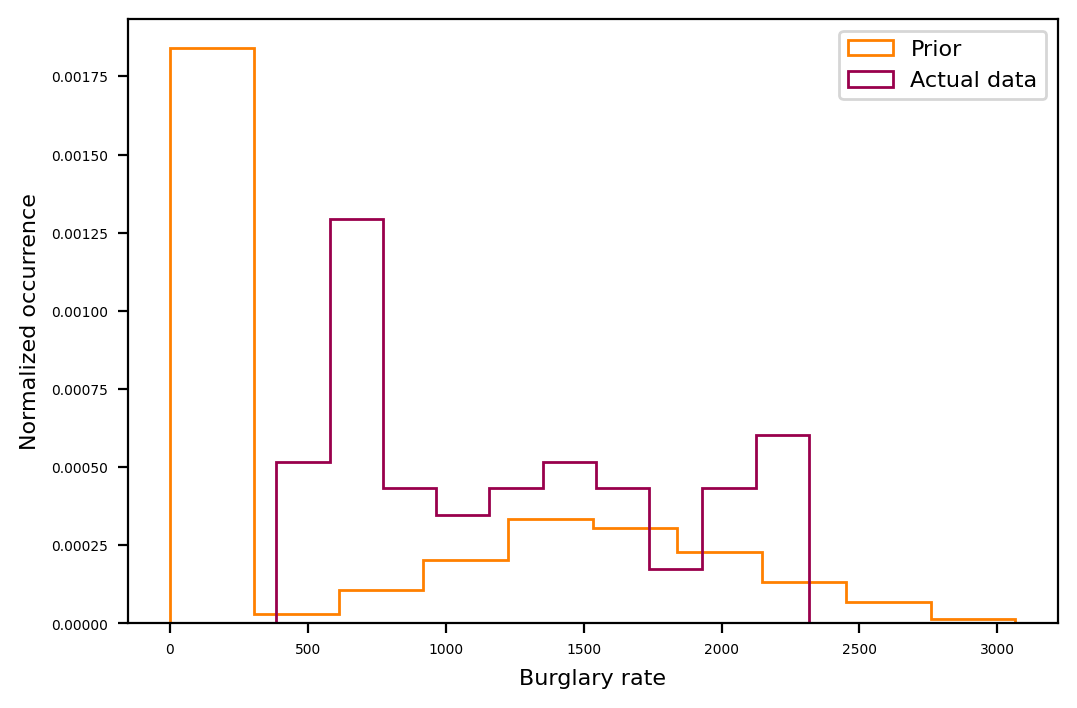

In [28]:
#histograms comparing prior and actual data
burglary_mean_ppc = np.mean(burglary_linear_pcc, axis = 1)
plt.hist(burglary_mean_ppc, bins=10, label= "Prior", histtype='step', density = True, color = '#ff8000')
plt.hist(california['Data.Rates.Property.Burglary'], bins=10, label= "Actual data", histtype='step',
         color = '#99004c', density = True)
plt.legend(loc="upper right", prop={'size':8})
plt.xlabel('Burglary rate', fontsize = 8)
plt.ylabel('Normalized occurrence', fontsize = 8)
plt.show()

The prior is able to detect the initial peak (at around 700), yet is is shifted to much to the left.

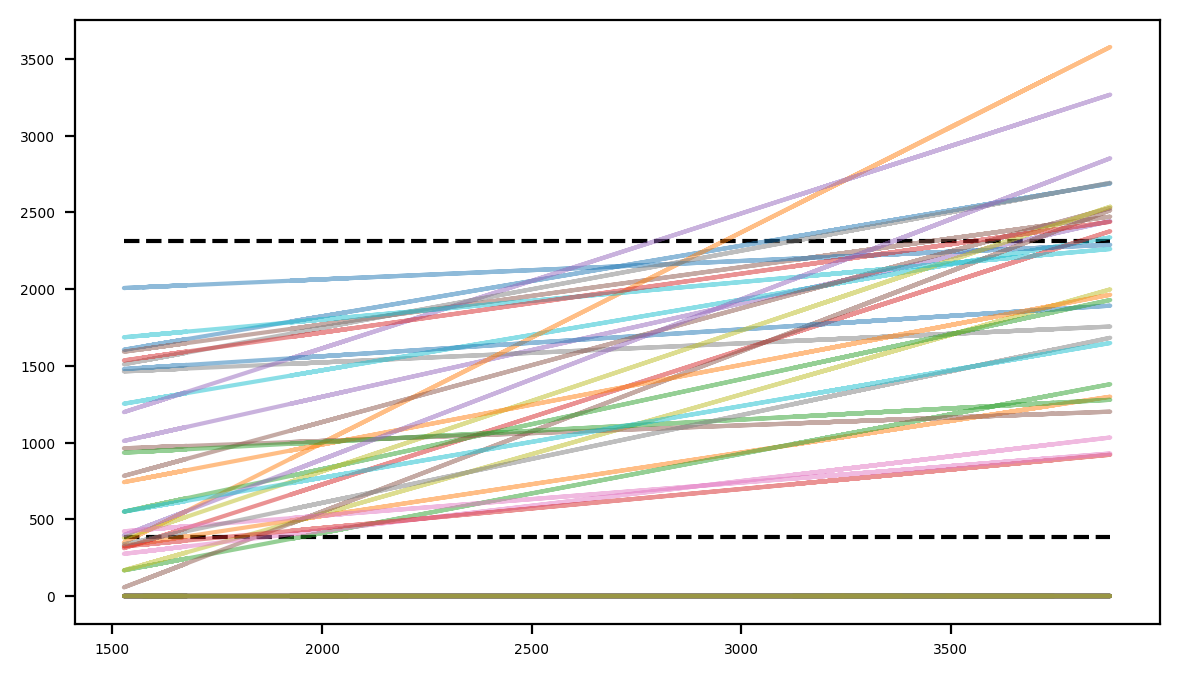

In [29]:
fig, axes = plt.subplots(1,1, figsize = (7,4))
axes.hlines([386, 2316], xmin = california['Data.Rates.Property.Larceny'].min(), 
            xmax = california['Data.Rates.Property.Larceny'].max(), linestyle = '--', color = 'black')
for i in range(60):
    axes.plot(california['Data.Rates.Property.Larceny'], 
              alpha_sim[i] + beta_sim[i]*california['c_Data.Rates.Property.Larceny'], alpha = 0.5)

It is visible that for smaller values of larceny rates, smaller values of burglary rates are proposed. Most of the lines fall into the range [386, 2316] of burglary rates .

# 5. Linear model - posterior 

In [ ]:
with open('linear_fit.stan', 'r') as file:
    print(file.read())

In [30]:
linear_fit_model = CmdStanModel(stan_file = 'linear_fit.stan')
stan_data={'N': len(california["Data.Rates.Property.Larceny"]), "larceny": 
           california["c_Data.Rates.Property.Larceny"],
           "burglaries": california["Data.Rates.Property.Burglary"] }


R = 1000
sim_linear_fit = linear_fit_model.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 1000,
                             chains = 4,
                             seed = 31052022) 

alpha_fit = sim_linear_fit.stan_variable('alpha')
beta_fit = sim_linear_fit.stan_variable('beta')
sigma_fit = sim_linear_fit.stan_variable('sigma')
burglary_linear_fit = sim_linear_fit.stan_variable('burglary')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


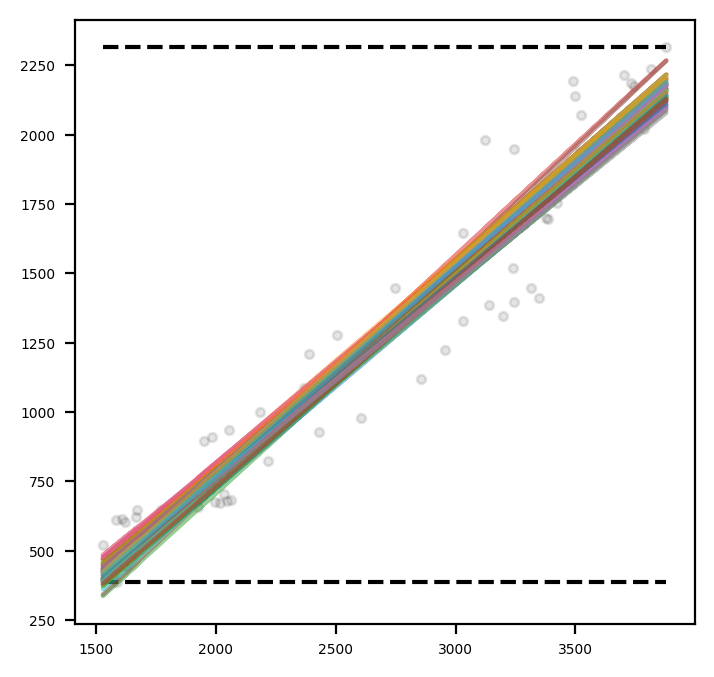

In [31]:
fig, axes = plt.subplots(1,1, figsize = (4,4))
axes.hlines([386, 2316], xmin = california['Data.Rates.Property.Larceny'].min(), 
            xmax = california['Data.Rates.Property.Larceny'].max(), linestyle = '--', color = 'black')
for i in range(60):
    axes.plot(california['Data.Rates.Property.Larceny'], 
              alpha_fit[i] + beta_fit[i]*california['c_Data.Rates.Property.Larceny'], alpha = 0.5)
axes.scatter(california['Data.Rates.Property.Larceny'], california['Data.Rates.Property.Burglary'], 
             color = 'black', alpha = 0.1, s=10)

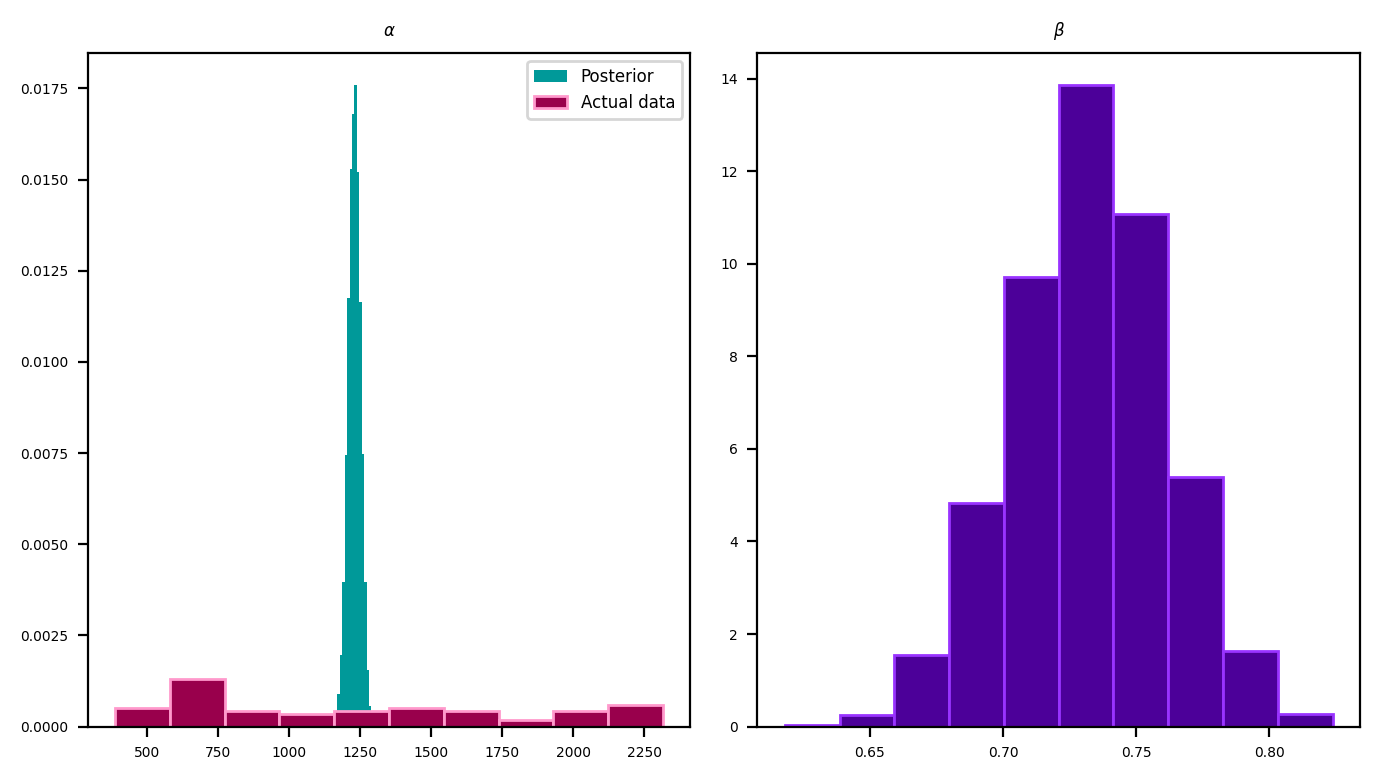

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(7,4))
ax = axes[0]
ax.hist(alpha_fit, bins = 20, label = 'Posterior',color = '#009999' ,density = True)
ax.hist(california["Data.Rates.Property.Burglary"], color = '#99004c', edgecolor ='#ff99cc' ,
        label = 'Actual data', density = True)
ax.set_title(r'$\alpha$', fontsize = 6)
ax.legend(prop={'size':6})
ax2 = axes[1]
ax2.hist(beta_fit, bins = 10, density = True, label = 'Beta', color = '#4c0099', edgecolor='#9933ff')
ax2.set_title(r'$\beta$', fontsize = 6)
fig.tight_layout()
plt.show()

The plots of $\alpha$ and $\beta$ parameter show that both parameters are concise and have a normal distribution. 

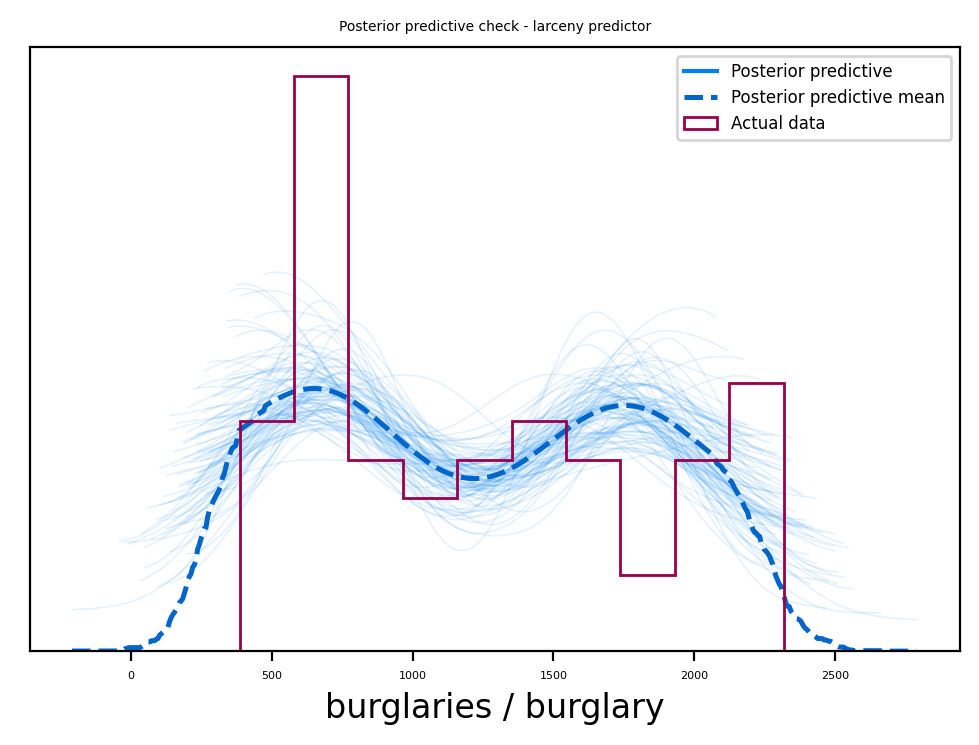

In [33]:
fit_id = az.from_cmdstanpy(posterior=sim_linear_fit, log_likelihood = 'log_lik', posterior_predictive='burglary',
                           observed_data={'burglaries':california["Data.Rates.Property.Burglary"]})

ax=az.plot_ppc(data=fit_id, alpha = 0.1,colors = ['#0080F0', 'blue', '#0066cc'], 
               data_pairs={'burglaries':'burglary'}, num_pp_samples=100, observed=False, textsize = 4)
plt.hist(california['Data.Rates.Property.Burglary'], bins=10, label= "Actual data", histtype='step',
         color = '#99004c', density = True)

ax.set_title('Posterior predictive check - larceny predictor', fontsize = 5)
ax.legend(prop={'size':6})

The posterior predictive samples form an almost symmetrical graph with two peaks - at around 600 and 1700 burglary rates. It seems to try to model the peak in the actual data at around 600, yet the result could have been better. The second peak in the posterior samples probably mirrors the second peak, but is a bit skewed to the left. The overall result is not very precise, yet seems to be not that far away from the actual data. 

# 6. Model comparison

In [34]:
fit_normal_id = az.from_cmdstanpy(posterior = sim_normal_fit, log_likelihood = 'log_lik', 
                                 posterior_predictive = 'burglary', 
                                  observed_data ={'burglaries':california['Data.Rates.Property.Burglary']} )


fit_linear_id = az.from_cmdstanpy(posterior=sim_linear_fit, log_likelihood = 'log_lik', 
                                  posterior_predictive='burglary',
                                   observed_data={'burglaries':california["Data.Rates.Property.Burglary"]})


/home/kasia/.local/lib/python3.8/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/home/kasia/.local/lib/python3.8/site-packages/arviz/stats/stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/home/kasia/.local/lib/python3.8/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


Text(0.5, 1.0, 'WAIC comparision')

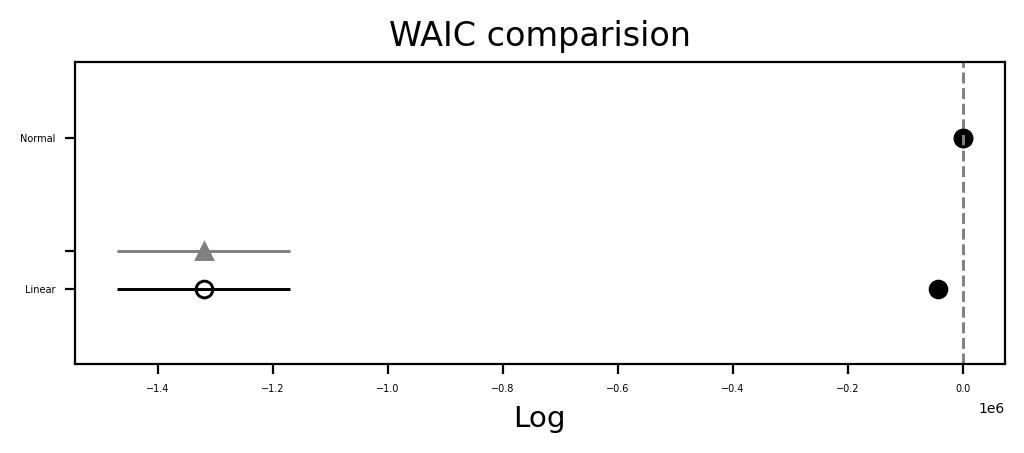

In [35]:

compare_dict = {'Normal': fit_normal_id,'Linear': fit_linear_id}
model_compare_waic = az.compare(dataset_dict=compare_dict, ic='waic')
az.plot_compare(model_compare_waic)
plt.title('WAIC comparision')


The WAIC comparison shows that the normal model better fits the data, yet the difference is not very big. The normal model does not overlap the actual data, weheras the linear one does.

In [ ]:
model_compare_loo = az.compare(compare_dict, ic="loo", method="stacking", scale="log")

print(model_compare_loo.head())
az.plot_compare(model_compare_loo)
plt.title('LOO comparison')

The LOO com
Have result for PSIS-LOO been discussed (is there a clear winner, or is there an overlap, were there any warnings) [1 pt]
Whas the model comparison discussed? Do authors agree with information criteria? Why in your opinion one model better than another [1 pt]
